In [44]:
%matplotlib inline

In [45]:
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
from ggplot import *
from dataMethods import *
import pandas as pd

In [46]:
import os
from os.path import expanduser

In [47]:
homeDirectory = expanduser("~")
dataDirectory = homeDirectory + os.sep + 'Google Drive/tACS_VWM_ALPHA/data/stim1/'

In [48]:
dataSheets = [dataDirectory + 's1/runData/run3_2016_Jul_21_1044.csv']

In [49]:
conds = OrderedDict([('t2d0', (2, 0)), ('t2d2', (2, 2)), ('t2d4', (2, 4)), ('t4d0', (4, 0)), ('t4d2', (4, 2)), ('t4d4', (4, 4))])

In [50]:
hemiConds = OrderedDict([('t1d0', (1, 0)), ('t1d1', (1, 1)), ('t1d2', (1, 2)), ('t2d0', (2, 0)), ('t2d1', (2, 1)), ('t2d2', (2, 2))])

In [51]:
testRuns = [(1,3)]

In [52]:
dataIndeces = []
for run in testRuns:
    for key in conds:
        dataIndeces.append(str(run)+key)

dataColumns = ['K', 'hitRate', 'faRate', 'RT', 'dPrime']

In [53]:
data = pd.DataFrame()
i = 0
for sheet in dataSheets:
    kVals = pashlerK(sheet)['Kvals']
    hitRates = pashlerK(sheet)['hitRates']
    faRates = pashlerK(sheet)['fAlarmRates']
    rtRates = rtCalc(sheet)
    dpVals = dprime(sheet)
    for key in conds:
        row = pd.Series([kVals[key],hitRates[key],faRates[key],rtRates[key],dpVals[key]],name=dataIndeces[i], index=dataColumns)
        row['targs'] = conds[key][0]
        row['dists'] = conds[key][1]
        data = data.append(row)
        i += 1

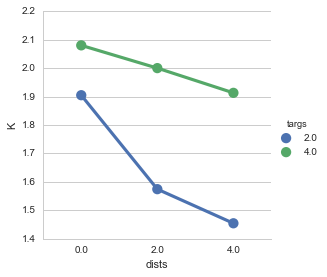

In [54]:
sns.factorplot(data=data,x='dists',y='K',hue='targs')

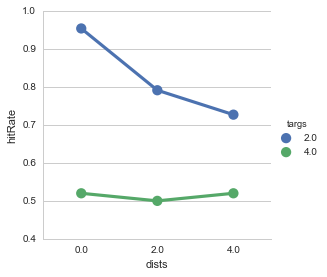

In [55]:
sns.factorplot(data=data,x='dists',y='hitRate',hue='targs')

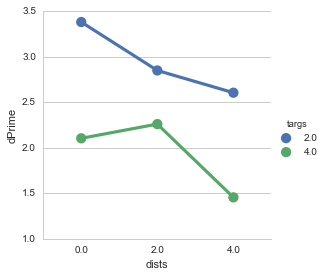

In [56]:
sns.factorplot(data=data,x='dists',y='dPrime',hue='targs')

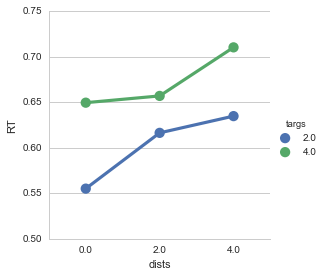

In [57]:
sns.factorplot(data=data,x='dists',y='RT',hue='targs')

In [58]:
hemDataIndeces = []
for run in testRuns:
    for key in hemiConds:
        hemDataIndeces.append(str(run)+key)

hemDataColumns = ['leftHitRate','rightHitRate']

In [59]:
hemData = pd.DataFrame()
j = 0
for sheet in dataSheets:
    leftHits = leftHemHitRates(sheet)
    rightHits = rightHemHitRates(sheet)
    for key in hemiConds:
        row = pd.Series([rightHits[key],leftHits[key]],name=hemDataIndeces[j], index=hemDataColumns)
        row['targs'] = hemiConds[key][0]
        row['dists'] = hemiConds[key][1]
        hemData = hemData.append(row)
        j += 1

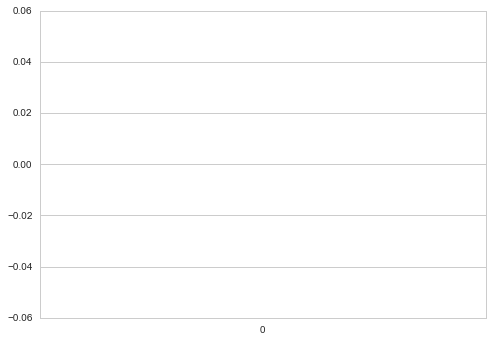

In [60]:
sns.stripplot()